In [1]:
cd /Users/amandaash/Desktop/Research/scripts/

/Users/amandaash/Desktop/Research/scripts


In [2]:
from __future__ import print_function, division, absolute_import

import os

%matplotlib inline
import matplotlib
from matplotlib import cm
import matplotlib.pyplot as plt
import numpy as np
from astropy.coordinates import SkyCoord
from astropy.time import Time
import astropy.io.ascii as at
import astropy.io.fits as fits
import astropy.units as u
from scipy.interpolate import interp1d
from cycler import cycler
import glob as glob

In [3]:
from k2_class_master import kep_io

In [4]:
%matplotlib inline

In [5]:
hdul = fits.open('/Users/amandaash/Desktop/Research/data/K2C16_Amanda/EPIC_211822797_mastC16.fits')
#list(hdul[1].data['quality'])

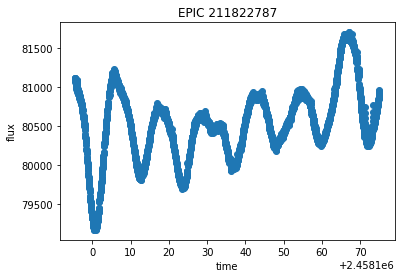

In [33]:
time,flux = kep_io.k2sc_io('/Users/amandaash/Desktop/Research/data/K2C16_Amanda/EPIC_211928486_mastC16.fits', True)

#print(list(time_UTC))


plt.scatter(np.array(time) + 2454833,flux)
plt.xlabel('time')
plt.ylabel('flux')
plt.title('EPIC 211822787')
plt.show()

In [7]:
obs_tab =[]
import csv

with open('/Users/amandaash/Desktop/Research/observation_info/observation_table.csv', 'r') as csvFile:
    obs_data = csv.reader(csvFile)
    for row in obs_data:
        obs_tab.append(row)
csvFile.close()


ID = []

for n in obs_tab[1:]:
    ID.append(n[0:2])

target_ID = np.unique(np.array(ID),axis = 0)

import glob

files = glob.glob('/Users/amandaash/Desktop/Research/data/K2C16_Amanda/*.fits')
EPIC_ID = []
for file in files:
    ID = (file.split('/')[7]).split('_')[1]
    EPIC_ID.append(ID)


for target in target_ID:
    EPIC = target[1]
    if EPIC in EPIC_ID:
        index = EPIC_ID.index(EPIC)
        light_curve = files[index]
        time,flux = kep_io.k2sff_io(light_curve)
        #I need to convert Julian day to a date and time so I can compare it against the EW variability
        plt.plot(time,flux)
        plt.xlabel('time')
        plt.ylabel('flux')
        plt.title(target[0] + ': EPIC ' + str(EPIC) )
        #plt.savefig('/Users/amandaash/Desktop/Research/plots/lightcurve/{0}_k2sff.pdf'.format(target[0]))
        plt.close()
        

In [8]:
obs_tab =[]
import csv

with open('/Users/amandaash/Desktop/Research/observation_info/observation_table.csv', 'r') as csvFile:
    obs_data = csv.reader(csvFile)
    for row in obs_data:
        obs_tab.append(row)
csvFile.close()


ID = []

for n in obs_tab[1:]:
    ID.append(n[0:2])

target_ID = np.unique(np.array(ID),axis = 0)

import glob

files = glob.glob('/Users/amandaash/Desktop/Research/data/K2C16_Amanda/*.fits')
EPIC_ID = []
for file in files:
    ID = (file.split('/')[7]).split('_')[1]
    EPIC_ID.append(ID)

for target in target_ID:
    EPIC = target[1]
    if EPIC in EPIC_ID:
        index = EPIC_ID.index(EPIC)
        light_curve = files[index]
        time_orig,flux_orig = kep_io.k2sc_io(light_curve, False)
        time_quality,flux_quality = kep_io.k2sc_io(light_curve, True)
        plt.figure(figsize = [10,8])
        plt.scatter(time_orig + 2454833,flux_orig, label = 'orig')
        plt.scatter(np.array(time_quality) + 2454833, np.array(flux_quality), label = 'quality')
        plt.xlabel('time (JD)')
        plt.ylabel('flux (counts)')
        plt.legend()
        plt.title(target[0] + ': EPIC ' + str(EPIC))
        plt.savefig('/Users/amandaash/Desktop/Research/plots/lightcurve/quality/{0}_k2sc.pdf'.format(target[0]))
        plt.close()

In [9]:
from scipy import stats
obs_tab =[]
import csv

with open('/Users/amandaash/Desktop/Research/observation_info/observation_table.csv', 'r') as csvFile:
    obs_data = csv.reader(csvFile)
    for row in obs_data:
        obs_tab.append(row)
csvFile.close()

target_list = []
for n in obs_tab[1:]:
    target_list.append([n[0], n[1]])
    

target_list = np.unique(target_list, axis = 0)

with open('/Users/amandaash/Desktop/Research/results/correlation_717.csv', 'w') as csvFile:
    row = ['litname', 'EPIC ID', 'spec type', 'P_rot', 'm', 'r', 'p', 'std', 'm/std']
    wr = csv.writer(csvFile, dialect = 'excel')
    wr.writerow(row)
csvFile.close()


for obj in target_list:
    litname = obj[0]
    EPIC = obj[1]
    
    time, flux = kep_io.k2sc_io('/Users/amandaash/Desktop/Research/data/K2C16_Amanda/EPIC_{0}_mastC16.fits'.format(EPIC), True)

    good_EW = []
    good_err_lower = []
    good_err_upper = []
    good_time = []
    
    bad_EW = []
    bad_err_lower = []
    bad_err_upper = []
    bad_time = []

    for target in obs_tab:
        if target[0] == litname and target[12] == str(0):
        
            EW16 = target[9]
            EW50 = target[10]
            EW84 = target[11]
    
            UTC_date = target[5]
            UTC_time = target[6]       
            UTC = str(UTC_date)  + ' ' + str(UTC_time)     
            UTC_time= Time(UTC, scale = 'utc')
    
            JD_time = UTC_time.jd
            good_time.append(JD_time)
            
            EqW = float(EW50)
            good_EW.append(EqW)
            
            perc16 = float(EW16)
            perc84 = float(EW84)
            lower_uncertainty = EqW - perc16
            good_err_lower.append(lower_uncertainty)
            upper_uncertainty = perc84 - EqW
            good_err_upper.append(upper_uncertainty)

        if target[0] == litname and target[12] == str(2):
            EW16 = target[9]
            EW50 = target[10]
            EW84 = target[11]
    
            UTC_date = target[5]
            UTC_time = target[6]       
            UTC = str(UTC_date)  + ' ' + str(UTC_time)     
            UTC_time= Time(UTC, scale = 'utc')
    
            JD_time = UTC_time.jd
            bad_time.append(JD_time)
            
            EqW = float(EW50)
            bad_EW.append(EqW)
            
            perc16 = float(EW16)
            perc84 = float(EW84)
            lower_uncertainty = EqW - perc16
            bad_err_lower.append(lower_uncertainty)
            upper_uncertainty = perc84 - EqW
            bad_err_upper.append(upper_uncertainty)

    good_v = [good_err_lower, good_err_upper]
    bad_v = [bad_err_lower, bad_err_upper]
    
    if len(good_EW) <= 2:
        continue
    
    good_days_index = []
    good_days = []
    bad_days_index = []
    bad_days = []
    
    for day in good_time:
        JD_time = np.abs((np.array(time) + 2454833) - day)
        corr_index = np.where(JD_time == np.min(JD_time))
        good_days_index.append(corr_index[0][0])
        good_days.append(time[corr_index[0][0]])

    for day in bad_time:
        JD_time = np.abs((np.array(time) + 2454833) - day)
        corr_index = np.where(JD_time == np.min(JD_time))
        bad_days_index.append(corr_index[0][0])
        bad_days.append(time[corr_index[0][0]])
    
    corr_flux_good = []
    corr_flux_bad = []
    
    for y in good_days_index:
        corr_flux_good.append(flux[y])
    for y in bad_days_index:
        corr_flux_bad.append(flux[y])

    plt.figure(figsize = (18,20))
    EW_vari = plt.subplot(311)
    lightcurve = plt.subplot(312)
    EW_flux = plt.subplot(313)

    #EW_vari.set_title(litname + ' EPIC ID: ' + EPIC, fontsize = 30)
    EW_vari.errorbar(good_time, good_EW, yerr = good_v, fmt = 'o', label = 'quality flag = 0')
    EW_vari.errorbar(bad_time, bad_EW, yerr = bad_v, fmt = 'o', color = 'r', label = 'quality flag = 2')
    EW_vari.set_xlim(np.min(good_time)-1, np.max(good_time)+1)
    EW_vari.set_ylim(np.max(good_EW) + 3*np.std(good_EW), np.min(good_EW)-3*np.std(good_EW))
    EW_vari.set_ylabel(r'$H_{\alpha}\ EW\ (\AA)$', fontsize = 26, labelpad = 24)
    EW_vari.tick_params(labelsize = 24)
    EW_vari.legend(prop = {'size' : 22})
    
    lightcurve.set_xlim(np.min(good_time) - 1, np.max(good_time)+1)
    lightcurve.set_ylim(np.median(flux) - 3*np.std(flux), np.median(flux) + 3*np.std(flux))
    lightcurve.vlines(np.array(good_days)+ 2454833, ymin = np.median(flux) - 3*np.std(flux), ymax = np.median(flux) + 3*np.std(flux), linestyle = 'dashed')
    lightcurve.vlines(np.array(bad_days)+ 2454833, ymin = np.median(flux) - 3*np.std(flux), ymax = np.median(flux) + 3*np.std(flux), linestyle = 'dashed')
    lightcurve.scatter(np.array(time) + 2454833, flux, color = '#F7BE81')
    lightcurve.scatter(np.array(good_days) + 2454833, corr_flux_good)
    lightcurve.scatter(np.array(bad_days) + 2454833, corr_flux_bad, color = 'r')
    lightcurve.tick_params(labelsize = 24)
    lightcurve.set_ylabel('Flux (counts)', fontsize = 26, labelpad = 24)
    lightcurve.set_xlabel('time (JD)', fontsize = 26, labelpad = 24)
    
    slope, intercept, rvalue, pvalue, std_err = stats.linregress(corr_flux_good, good_EW)
    line = slope*np.array(corr_flux_good) + intercept
    
    EW_flux.errorbar(corr_flux_good, good_EW, yerr = good_v, fmt = 'o', label = 'quality flag = 0')
    EW_flux.errorbar(corr_flux_bad, bad_EW, yerr = bad_v, fmt = 'o', color = 'r', label = 'quality flag = 2')
    EW_flux.plot(corr_flux_good, line, linestyle = 'dotted', color = 'grey', label = 'linear correlation, quality flag = 0', linewidth = 3)
    EW_flux.set_xlim(np.min(corr_flux_good)-0.5*np.std(corr_flux_good), np.max(corr_flux_good)+0.5*np.std(corr_flux_good))
    EW_flux.set_ylim(np.max(good_EW) + 3*np.std(good_EW), np.min(good_EW)-3*np.std(good_EW))
    EW_flux.tick_params(labelsize = 24)
    EW_flux.set_xlabel('flux (counts)', fontsize = 26, labelpad = 24)
    EW_flux.set_ylabel(r'$H_{\alpha}\ EW\ (\AA)$', fontsize = 26, labelpad = 24)
    EW_flux.legend(prop = {'size' : 22})
    
    EW_flux.text(np.min(corr_flux_good) - 10, np.max(good_EW) + np.std(good_EW),r'$m = $' + '%s' % float('%.6g' % slope), fontsize = 30)
    EW_flux.text(np.min(corr_flux_good) - 10, np.max(good_EW) + 2*np.std(good_EW),r'$\sigma = $' + '%s' % float('%.6g' % std_err), fontsize = 30)
    
    plt.tight_layout()
    #plt.savefig('/Users/amandaash/Desktop/Research/plots/EW_lightcurve_analysis/paper_quality_{0}.png'.format(litname))
    plt.close()
    
    with open('/Users/amandaash/Desktop/Research/results/correlation_717.csv', 'a') as csvFile:
        row = [litname, EPIC, 0, 0, slope, rvalue, pvalue, std_err, slope/std_err]
        wr = csv.writer(csvFile, dialect = 'excel')
        wr.writerow(row)
    csvFile.close()

    

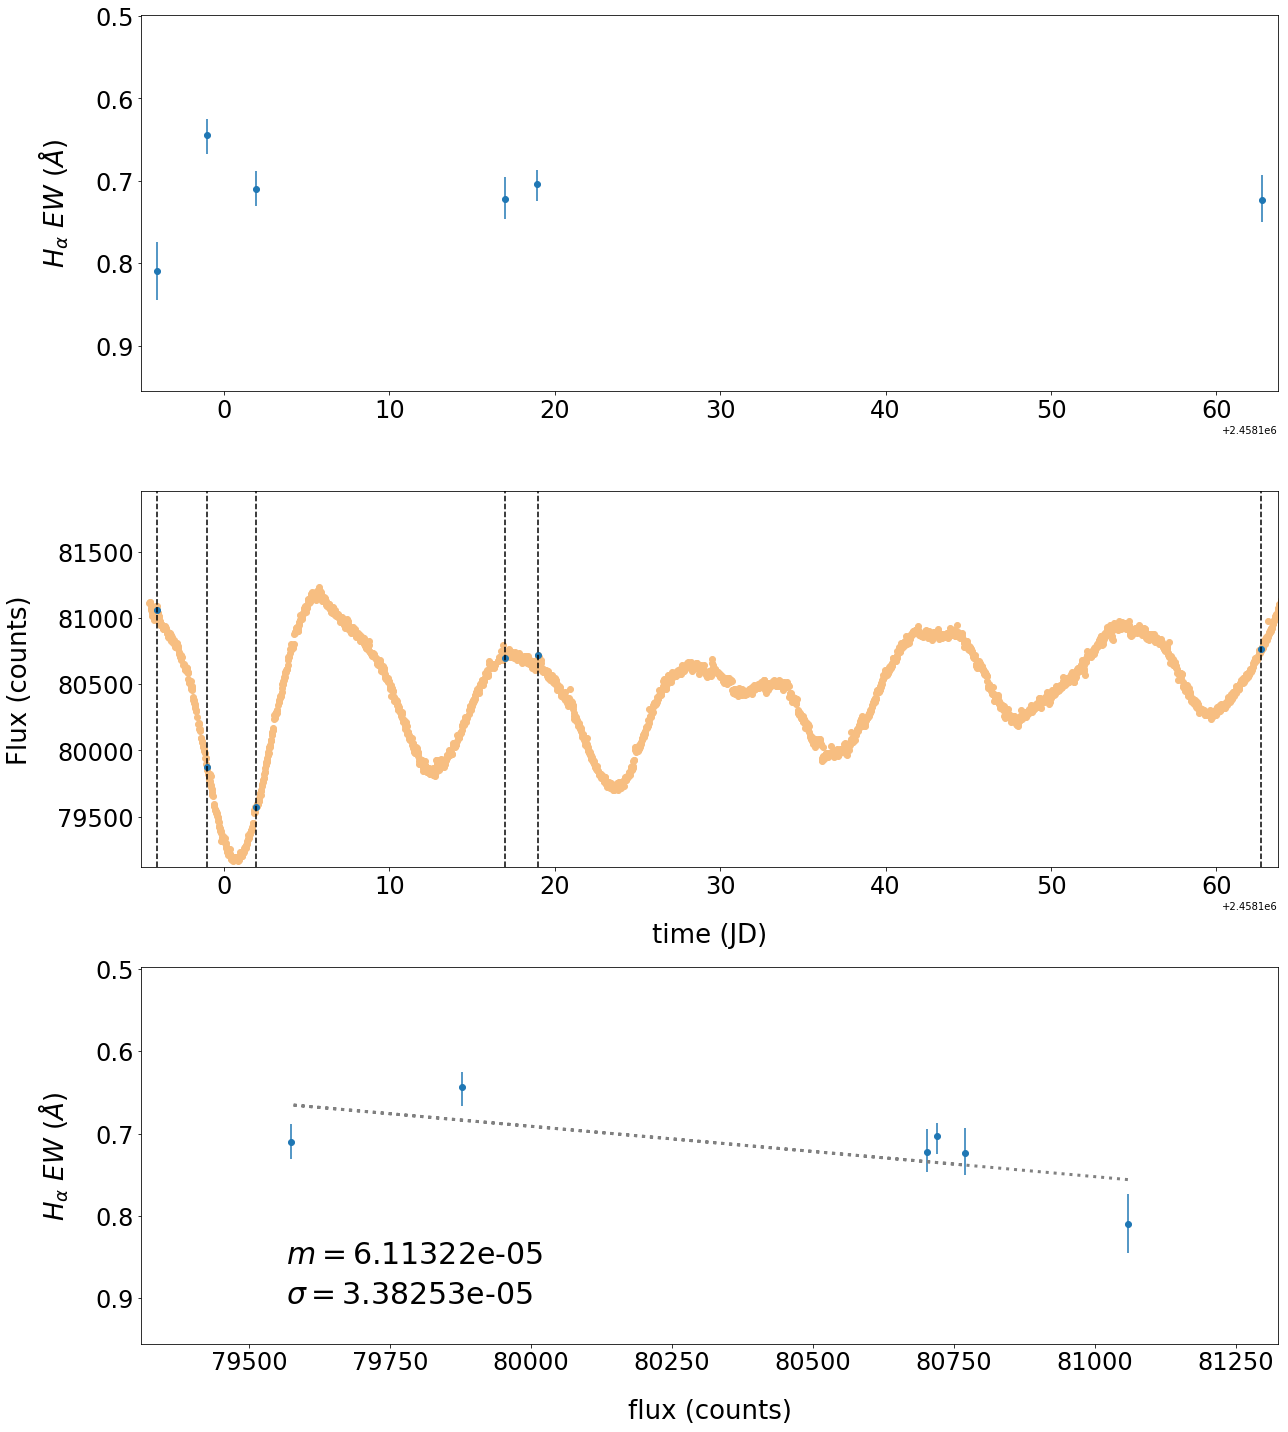

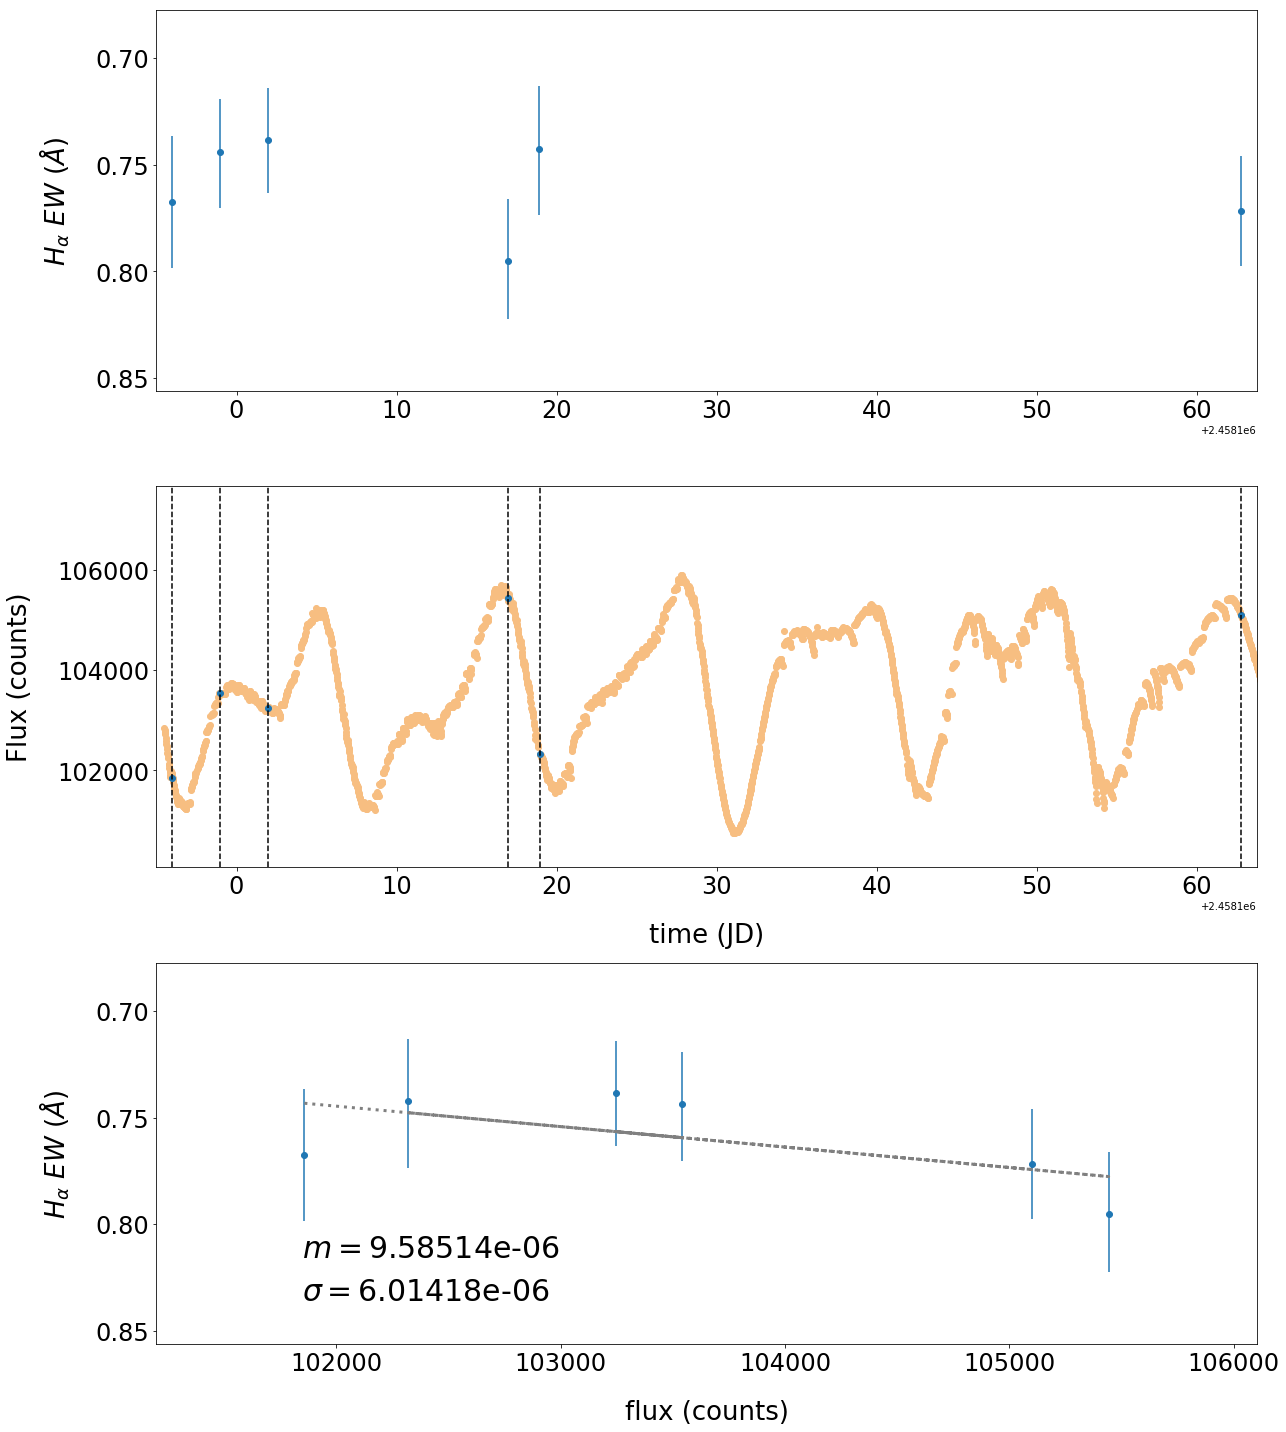

In [42]:
#morris targets
from scipy import stats
obs_tab =[]
import csv

with open('/Users/amandaash/Desktop/morris_obs_tab.csv', 'r') as csvFile:
    obs_data = csv.reader(csvFile)
    for row in obs_data:
        obs_tab.append(row)
csvFile.close()

target_list = []
for n in obs_tab[1:]:
    target_list.append([n[0], n[1]])
    

target_list = np.unique(target_list, axis = 0)

with open('/Users/amandaash/Desktop/morris_correlation.csv', 'w') as csvFile:
    row = ['litname', 'EPIC ID', 'spec type', 'P_rot', 'm', 'r', 'p', 'std', 'm/std']
    wr = csv.writer(csvFile, dialect = 'excel')
    wr.writerow(row)
csvFile.close()


for obj in target_list:
    litname = obj[0]
    EPIC = obj[1]
    time, flux = kep_io.k2sc_io('/Users/amandaash/Desktop/Research/data/K2C16_Amanda/EPIC_{0}_mastC16.fits'.format(EPIC), True)
    time = np.array(time) + 2454833
    
    
    EW = []
    err_lower = []
    err_upper = []
    time_EW = []

    for target in obs_tab:
        if target[0] == litname:
            
            EW16 = float(target[5])
            EW50 = float(target[6])
            EW84 = float(target[7])
            
            JD_time = float(target[4])
            if JD_time >= np.min(time):
                time_EW.append(JD_time)
            
                EqW = float(EW50)
                EW.append(EqW)
            
                perc16 = float(EW16)
                perc84 = float(EW84)
                lower_uncertainty = EqW - perc16
                err_lower.append(lower_uncertainty)
                upper_uncertainty = perc84 - EqW
                err_upper.append(upper_uncertainty)

    v = [err_lower, err_upper]
    
    days_index = []
    days = []
    
    for day in time_EW:
        if day <= np.min(time):
            continue
        else:
            JD_time = np.abs((np.array(time)) - day)
            corr_index = np.where(JD_time == np.min(JD_time))
            days_index.append(corr_index[0][0])
            days.append(time[corr_index[0][0]])

    
    corr_flux = []
    
    for y in days_index:
        corr_flux.append(flux[y])
        
    plt.figure(figsize = (18,20))
    
    EW_vari = plt.subplot(311)
    lightcurve = plt.subplot(312)
    EW_flux = plt.subplot(313)

    #EW_vari.set_title(litname + ' EPIC ID: ' + EPIC, fontsize = 30)
    EW_vari.errorbar(time_EW, EW, yerr = v, fmt = 'o')
    EW_vari.set_xlim(np.min(time_EW)-1, np.max(time_EW)+1)
    EW_vari.set_ylim(np.max(EW) + 3*np.std(EW), np.min(EW)-3*np.std(EW))
    EW_vari.set_ylabel(r'$H_{\alpha}\ EW\ (\AA)$', fontsize = 26, labelpad = 24)
    EW_vari.tick_params(labelsize = 24)
    
    lightcurve.set_xlim(np.min(time_EW) - 1, np.max(time_EW)+1)
    lightcurve.set_ylim(np.median(flux) - 3*np.std(flux), np.median(flux) + 3*np.std(flux))
    lightcurve.vlines(np.array(days), ymin = np.median(flux) - 3*np.std(flux), ymax = np.median(flux) + 3*np.std(flux), linestyle = 'dashed')
    lightcurve.scatter(np.array(time), flux, color = '#F7BE81')
    lightcurve.scatter(np.array(days), corr_flux)
    lightcurve.tick_params(labelsize = 24)
    lightcurve.set_ylabel('Flux (counts)', fontsize = 26, labelpad = 24)
    lightcurve.set_xlabel('time (JD)', fontsize = 26, labelpad = 24)
    
    slope, intercept, rvalue, pvalue, std_err = stats.linregress(corr_flux, EW)
    line = slope*np.array(corr_flux) + intercept
    
    EW_flux.errorbar(corr_flux, EW, yerr = v, fmt = 'o')
    EW_flux.plot(corr_flux, line, linestyle = 'dotted', color = 'grey', linewidth = 3)
    EW_flux.set_xlim(np.min(corr_flux)-0.5*np.std(corr_flux), np.max(corr_flux)+0.5*np.std(corr_flux))
    EW_flux.set_ylim(np.max(EW) + 3*np.std(EW), np.min(EW)-3*np.std(EW))
    EW_flux.tick_params(labelsize = 24)
    EW_flux.set_xlabel('flux (counts)', fontsize = 26, labelpad = 24)
    EW_flux.set_ylabel(r'$H_{\alpha}\ EW\ (\AA)$', fontsize = 26, labelpad = 24)

    EW_flux.text(np.min(corr_flux) - 10, np.max(EW) + np.std(EW),r'$m = $' + '%s' % float('%.6g' % slope), fontsize = 30)
    EW_flux.text(np.min(corr_flux) - 10, np.max(EW) + 2*np.std(EW),r'$\sigma = $' + '%s' % float('%.6g' % std_err), fontsize = 30)
    
    plt.tight_layout()
    plt.savefig('/Users/amandaash/Desktop/Research/plots/EW_lightcurve_analysis/paper_quality_{0}.png'.format(litname))
    plt.show()
    
    with open('/Users/amandaash/Desktop/morris_correlation.csv', 'a') as csvFile:
        row = [litname, EPIC, 0, 0, slope, rvalue, pvalue, std_err, slope/std_err]
        wr = csv.writer(csvFile, dialect = 'excel')
        wr.writerow(row)
    csvFile.close()

    

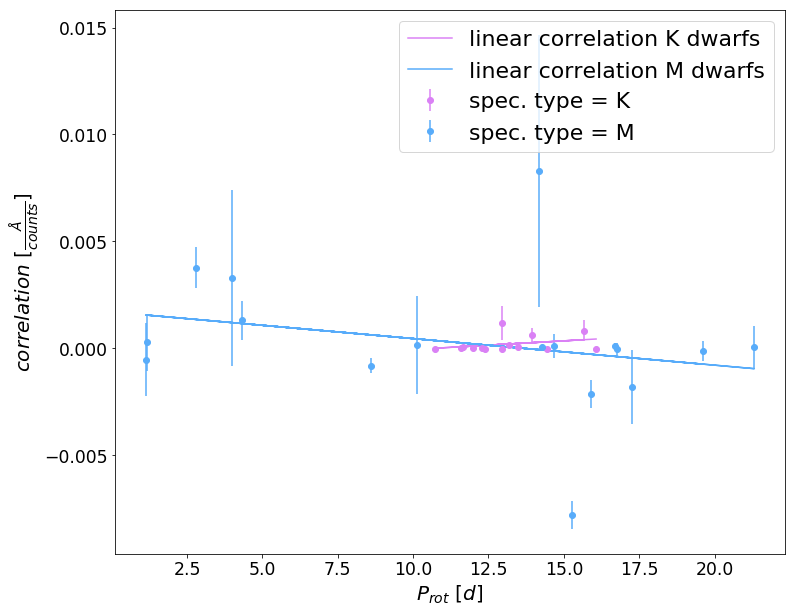

1.1563453399622696
-1.0419184573881293


In [7]:
import csv
from scipy import stats
rot_corr = []
with open('/Users/amandaash/Desktop/Research/results/correlation_master.csv', 'r') as csvFile:
    rot_info = csv.reader(csvFile)
    for row in rot_info:
        rot_corr.append(row)
csvFile.close()

K_corr_array = []
K_err_array = []
K_period_array = []

M_corr_array = []
M_err_array = []
M_period_array = []

for target in rot_corr[1:]:
    period = target[3]
    if period == 'NA':
        continue
    else:
        spec_type = target[2]
        period = target[3]
        period = float(period)
        corr = float(target[4])
        err = float(target[7])
        
        if spec_type[0] == 'K':
            K_corr_array.append(corr)
            K_err_array.append(err)
            K_period_array.append(period)
        if spec_type[0] == 'M':
            M_corr_array.append(corr)
            M_err_array.append(err)
            M_period_array.append(period)

slope_k, intercept_k, rvalue_k, pvalue_k, std_err_k = stats.linregress(K_period_array, K_corr_array)
line_k = slope_k*np.array(K_period_array) + intercept_k

slope_m, intercept_m, rvalue_m, pvalue_m, std_err_m = stats.linregress(M_period_array, M_corr_array)
line_m = slope_m*np.array(M_period_array) + intercept_m

plt.figure(figsize = [12,10])
plt.errorbar(K_period_array, K_corr_array, yerr = K_err_array, fmt = 'o', color = '#DA81F5', label = 'spec. type = K')
plt.errorbar(M_period_array, M_corr_array, yerr = M_err_array, fmt = 'o', color = '#58ACFA', label = 'spec. type = M')
plt.plot(K_period_array, line_k, color = '#DA81F5', label = 'linear correlation K dwarfs')
plt.plot(M_period_array, line_m, color = '#58ACFA', label = 'linear correlation M dwarfs')
plt.ylabel(r'$correlation \ [\frac{\AA}{counts}]$', fontsize = 20)
plt.xlabel(r'$P_{rot} \ [d]$', fontsize = 20)
plt.tick_params(labelsize = 'xx-large')
#plt.title(r'$H_{\alpha} \ EW \ - \ flux \ correlation \ vs. \ P_{rot}$', fontsize = 30)
plt.legend(prop = {'size' : 22})
plt.savefig('/Users/amandaash/Desktop/Research/results/paper_quality_corrvP.pdf')
plt.show()

print(slope_k/std_err_k)
print(slope_m/std_err_m)
    
    

In [ ]:
#variability and spectral type

